# Fig11. Distribution of projects according to funding received.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import matplotlib as mpl

plt.style.use('seaborn-muted')

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data = read_csv(file_path)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    mini = data[["ID proyecto","Financiación"]]
    data = data[data["Financiación"] != 0]
    data.drop_duplicates(subset ="ID proyecto", keep = "first", inplace = True)
    # mini = mini.groupby(['ID proyecto'])["Financiación"].apply(list).reset_index(name='Financiación')
    # new_fins = [fin[0] for fin in mini["Financiación"]]
    # mini["Financiación"] = new_fins
    mini = mini.drop(["ID proyecto"], axis=1)
    grp = mini.groupby(pd.cut(mini["Financiación"], np.arange(0, 1+mini['Financiación'].max(), 10000))).agg({'Financiación':['count']})
    
    grp["pcts"] = grp.apply(lambda x:100 * x / float(x.sum()))
    grp['cum_sum'] = grp['pcts'].cumsum()
    grp.reset_index(level=[0], inplace=True)
    grp.columns = grp.columns.droplevel(1)
    grp.columns = ["rango","count","pcts","pcts_sum"]
    
    grp = grp[grp["count"] > 0]
    df1 = grp[grp["pcts_sum"] <= 98]
    more_df = grp[grp['pcts_sum'] > 98]
    more_pcts = grp.loc[grp['pcts_sum'] > 98, "pcts"].sum()
    more_count = more_df["count"].sum()
    result = df1.append({'rango' : '(250000 - More)',
                      'count': more_count,
                      'pcts' : more_pcts,
                      'pcts_sum': 100
                    } , ignore_index=True)
   
    return result

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

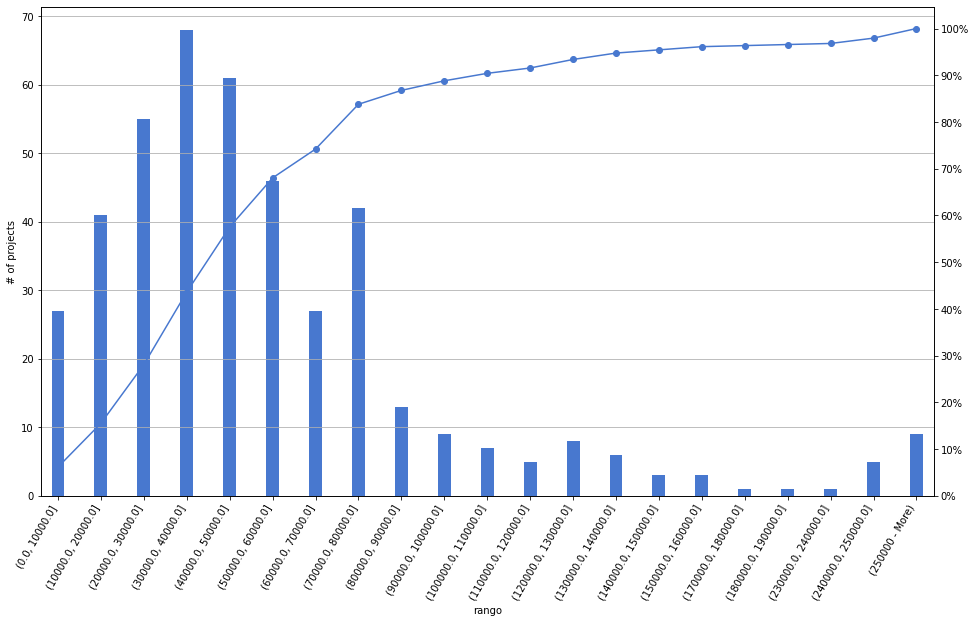

In [5]:
plt.figure()
ax1 = df2[['rango', 'count']].plot(x='rango', kind="bar", figsize=(16,9), legend=False, width=0.3)
ax1.set_ylabel("# of projects")
ax2 = df2['pcts_sum'].plot(secondary_y=True, marker='o')
ax2.set_ylim(bottom=0)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10.00))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60, ha="right")
# plt.title("Number of research projects and total funding across the whole analysed period (1993-2019)",fontsize=20,fontweight="bold")
ax1.grid(axis="y")
#ax2.grid(axis="y")
plt.show()

In [6]:
df2

,rango,count,pcts,pcts_sum
0,"(0.0, 10000.0]",27,6.164384,6.164384
1,"(10000.0, 20000.0]",41,9.360731,15.525114
2,"(20000.0, 30000.0]",55,12.557078,28.082192
3,"(30000.0, 40000.0]",68,15.525114,43.607306
4,"(40000.0, 50000.0]",61,13.926941,57.534247
5,"(50000.0, 60000.0]",46,10.502283,68.036530
6,"(60000.0, 70000.0]",27,6.164384,74.200913
7,"(70000.0, 80000.0]",42,9.589041,83.789954
8,"(80000.0, 90000.0]",13,2.968037,86.757991
9,"(90000.0, 100000.0]",9,2.054795,88.812785
